# Project On Book Recommendation

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# EDA

In [102]:
books = pd.read_csv("books_data_50_1.csv")
books

,Unnamed: 0,book_id,title,author,average_rating,genre,description,url,image_url
0,0,2657,To Kill a Mockingbird,Harper Lee,4.27,Classics,The unforgettable novel of a childhood in a sl...,https://www.goodreads.com/book/show/2657.To_Ki...,https://i.gr-assets.com/images/S/compressed.ph...
1,1,3,Harry Potter and the Sorcerer's Stone,J.K. Rowling,4.47,Fantasy,Harry Potter's life is miserable. His parents ...,https://www.goodreads.com/book/show/3.Harry_Po...,https://i.gr-assets.com/images/S/compressed.ph...
2,2,1885,Pride and Prejudice,Jane Austen,4.27,Classics,Alternate cover edition of ISBN 9780679783268S...,https://www.goodreads.com/book/show/1885.Pride...,https://i.gr-assets.com/images/S/compressed.ph...
3,3,48855,The Diary of a Young Girl,Anne Frank,4.17,Nonfiction,Discovered in the attic in which she spent the...,https://www.goodreads.com/book/show/48855.The_...,https://i.gr-assets.com/images/S/compressed.ph...
4,4,170448,Animal Farm,George Orwell,3.97,Classics,Librarian's note: There is an Alternate Cover ...,https://www.goodreads.com/book/show/170448.Ani...,https://i.gr-assets.com/images/S/compressed.ph...
...,...,...,...,...,...,...,...,...,...
4300,4300,9413044,Everneath,Brodi Ashton,3.74,Young Adult,"Last spring, Nikki Beckett vanished, sucked in...",https://www.goodreads.com/book/show/9413044-ev...,https://i.gr-assets.com/images/S/compressed.ph...
4301,4301,25526965,End of Watch,Stephen King,4.09,Horror,The spectacular finale to the New York Times b...,https://www.goodreads.com/book/show/25526965-e...,https://i.gr-assets.com/images/S/compressed.ph...
4302,4302,10846336,Salvage the Bones,Jesmyn Ward,3.93,Fiction,Winner of the 2011 National Book Award for Fic...,https://www.goodreads.com/book/show/10846336-s...,https://i.gr-assets.com/images/S/compressed.ph...
4303,4303,15803037,Red Sparrow,Jason Matthews,3.95,Fiction,In the grand spy-tale tradition of John le Car...,https://www.goodreads.com/book/show/15803037-r...,https://i.gr-assets.com/images/S/compressed.ph...


In [103]:
books = books.drop(["Unnamed: 0"],axis=1)

In [104]:
books.head()

,book_id,title,author,average_rating,genre,description,url,image_url
0,2657,To Kill a Mockingbird,Harper Lee,4.27,Classics,The unforgettable novel of a childhood in a sl...,https://www.goodreads.com/book/show/2657.To_Ki...,https://i.gr-assets.com/images/S/compressed.ph...
1,3,Harry Potter and the Sorcerer's Stone,J.K. Rowling,4.47,Fantasy,Harry Potter's life is miserable. His parents ...,https://www.goodreads.com/book/show/3.Harry_Po...,https://i.gr-assets.com/images/S/compressed.ph...
2,1885,Pride and Prejudice,Jane Austen,4.27,Classics,Alternate cover edition of ISBN 9780679783268S...,https://www.goodreads.com/book/show/1885.Pride...,https://i.gr-assets.com/images/S/compressed.ph...
3,48855,The Diary of a Young Girl,Anne Frank,4.17,Nonfiction,Discovered in the attic in which she spent the...,https://www.goodreads.com/book/show/48855.The_...,https://i.gr-assets.com/images/S/compressed.ph...
4,170448,Animal Farm,George Orwell,3.97,Classics,Librarian's note: There is an Alternate Cover ...,https://www.goodreads.com/book/show/170448.Ani...,https://i.gr-assets.com/images/S/compressed.ph...


In [105]:
books.tail()

,book_id,title,author,average_rating,genre,description,url,image_url
4300,9413044,Everneath,Brodi Ashton,3.74,Young Adult,"Last spring, Nikki Beckett vanished, sucked in...",https://www.goodreads.com/book/show/9413044-ev...,https://i.gr-assets.com/images/S/compressed.ph...
4301,25526965,End of Watch,Stephen King,4.09,Horror,The spectacular finale to the New York Times b...,https://www.goodreads.com/book/show/25526965-e...,https://i.gr-assets.com/images/S/compressed.ph...
4302,10846336,Salvage the Bones,Jesmyn Ward,3.93,Fiction,Winner of the 2011 National Book Award for Fic...,https://www.goodreads.com/book/show/10846336-s...,https://i.gr-assets.com/images/S/compressed.ph...
4303,15803037,Red Sparrow,Jason Matthews,3.95,Fiction,In the grand spy-tale tradition of John le Car...,https://www.goodreads.com/book/show/15803037-r...,https://i.gr-assets.com/images/S/compressed.ph...
4304,6621287,com نسيان,أحلام مستغانمي,3.68,Novels,"هذا الكتاب للكاتبة الشهيرة والتي ""صُنّفت من بي...",https://www.goodreads.com/book/show/6621287-com,https://i.gr-assets.com/images/S/compressed.ph...


In [106]:
# Data Structure
type(books)

pandas.core.frame.DataFrame

In [107]:
books.shape

(4305, 8)

In [108]:
# Datatypes
books.dtypes

book_id             int64
title              object
author             object
average_rating    float64
genre              object
description        object
url                object
image_url          object
dtype: object

# Datatype Conversion

In [109]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4305 entries, 0 to 4304
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   book_id         4305 non-null   int64  
 1   title           4305 non-null   object 
 2   author          4305 non-null   object 
 3   average_rating  4305 non-null   float64
 4   genre           4305 non-null   object 
 5   description     4305 non-null   object 
 6   url             4305 non-null   object 
 7   image_url       4305 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 269.2+ KB


In [110]:
# Checking for null values
books.isnull().sum()

book_id           0
title             0
author            0
average_rating    0
genre             0
description       0
url               0
image_url         0
dtype: int64

In [111]:
books.duplicated().sum()

0

In [112]:
books.drop_duplicates(keep='first',inplace= True)

In [113]:
books.shape

(4305, 8)

In [114]:
books['genre'].value_counts()

Fiction             991
Nonfiction          497
Fantasy             417
Classics            337
Young Adult         230
                   ... 
Literature            1
Relationships         1
Literary Fiction      1
Esoterica             1
Anthologies           1
Name: genre, Length: 87, dtype: int64

<AxesSubplot:>

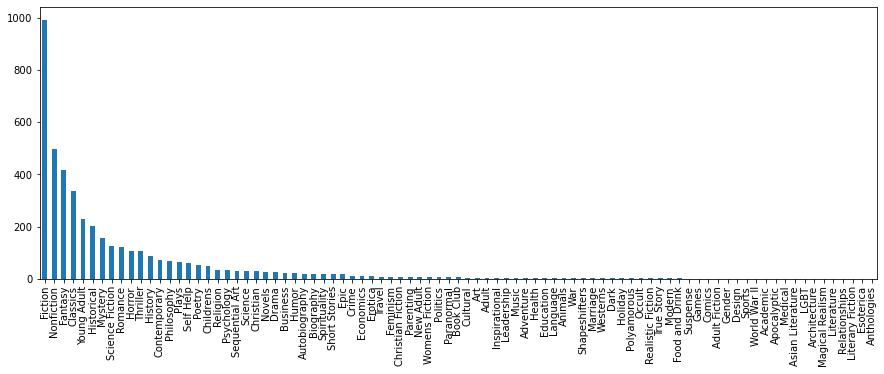

In [115]:
books.genre.value_counts().plot(x='genre',y = 'count',kind = 'bar',figsize = (15,5))

In [116]:
#print the title and description of a random sample
print(books['title'][15])
books['description'][20]

The Kite Runner


'Generations of readers young and old, male and female, have fallen in love with the March sisters of Louisa May Alcott’s most popular and enduring novel, Little Women. Here are talented tomboy and author-to-be Jo, tragically frail Beth, beautiful Meg, and romantic, spoiled Amy, united in their devotion to each other and their struggles to survive in New England during the Civil War.It is no secret that Alcott based Little Women on her own early life. While her father, the freethinking reformer and abolitionist Bronson Alcott, hobnobbed with such eminent male authors as Emerson, Thoreau, and Hawthorne, Louisa supported herself and her sisters with "woman’s work,” including sewing, doing laundry, and acting as a domestic servant. But she soon discovered she could make more money writing. Little Women brought her lasting fame and fortune, and far from being the "girl’s book” her publisher requested, it explores such timeless themes as love and death, war and peace, the conflict between p

In [117]:
books.author.value_counts()

Stephen King           45
John Grisham           23
C.S. Lewis             20
William Shakespeare    20
Terry Pratchett        18
                       ..
R.D. Blackmore          1
Cornelius Ryan          1
Lisa Genova             1
Bette Greene            1
Dylan Thomas            1
Name: author, Length: 2563, dtype: int64

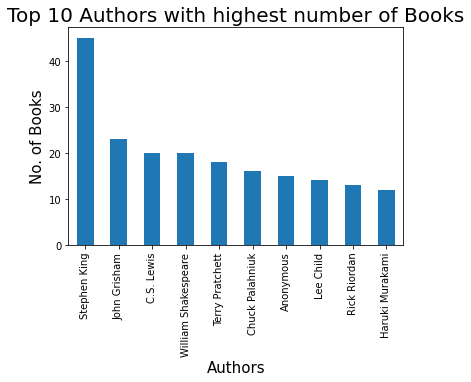

In [118]:
books["author"].value_counts().sort_values(ascending=False).head(10).plot.bar()#color=color
plt.title("Top 10 Authors with highest number of Books",fontsize=20)
plt.xlabel("Authors",fontsize=15)
plt.ylabel("No. of Books",fontsize=15)
plt.show()

<Figure size 864x720 with 0 Axes>

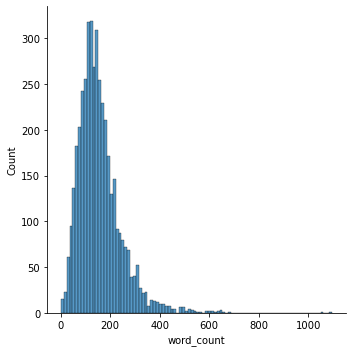

In [119]:
#Calculating the word count for book description
import seaborn as sns
import matplotlib.pyplot as plt
books['word_count'] = books['description'].apply(lambda x: len(str(x).split()))# Plotting the word count
plt.figure(figsize=[12, 10])
sns.displot(books['word_count'])

The book descriptions are not too lengthy. Average length of book descriptions are mostly of 200 words.

In [120]:
books.head()

,book_id,title,author,average_rating,genre,description,url,image_url,word_count
0,2657,To Kill a Mockingbird,Harper Lee,4.27,Classics,The unforgettable novel of a childhood in a sl...,https://www.goodreads.com/book/show/2657.To_Ki...,https://i.gr-assets.com/images/S/compressed.ph...,137
1,3,Harry Potter and the Sorcerer's Stone,J.K. Rowling,4.47,Fantasy,Harry Potter's life is miserable. His parents ...,https://www.goodreads.com/book/show/3.Harry_Po...,https://i.gr-assets.com/images/S/compressed.ph...,220
2,1885,Pride and Prejudice,Jane Austen,4.27,Classics,Alternate cover edition of ISBN 9780679783268S...,https://www.goodreads.com/book/show/1885.Pride...,https://i.gr-assets.com/images/S/compressed.ph...,100
3,48855,The Diary of a Young Girl,Anne Frank,4.17,Nonfiction,Discovered in the attic in which she spent the...,https://www.goodreads.com/book/show/48855.The_...,https://i.gr-assets.com/images/S/compressed.ph...,166
4,170448,Animal Farm,George Orwell,3.97,Classics,Librarian's note: There is an Alternate Cover ...,https://www.goodreads.com/book/show/170448.Ani...,https://i.gr-assets.com/images/S/compressed.ph...,123


# Data Preprocessing

In [121]:
books.genre.unique()

array(['Classics', 'Fantasy', 'Nonfiction', 'Fiction', 'Young Adult',
       'Childrens', 'Science Fiction', 'Poetry', 'Horror', 'Religion',
       'History', 'Mystery', 'Historical', 'Travel', 'Romance',
       'Philosophy', 'Science', 'Thriller', 'Sequential Art', 'Christian',
       'Academic', 'Self Help', 'Language', 'Plays', 'Cultural',
       'Contemporary', 'Drama', 'Short Stories', 'Psychology', 'Feminism',
       'Christian Fiction', 'Adventure', 'Biography', 'Food and Drink',
       'Spirituality', 'Business', 'Novels', 'Paranormal', 'Holiday',
       'Crime', 'Apocalyptic', 'Inspirational', 'Autobiography',
       'Realistic Fiction', 'Economics', 'Epic', 'Book Club', 'Marriage',
       'Humor', 'Politics', 'Polyamorous', 'Erotica', 'Womens Fiction',
       'Health', 'New Adult', 'Shapeshifters', 'War', 'Design', 'Adult',
       'Parenting', 'Gender', 'Education', 'Animals', 'LGBT', 'Modern',
       'Magical Realism', 'Music', 'Art', 'Dark', 'Leadership',
       'Suspense',

In [122]:
#filtering books with genres consiting more than 100 books
df = books[books['genre'].map(books['genre'].value_counts()) > 100]

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3293 entries, 0 to 4303
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   book_id         3293 non-null   int64  
 1   title           3293 non-null   object 
 2   author          3293 non-null   object 
 3   average_rating  3293 non-null   float64
 4   genre           3293 non-null   object 
 5   description     3293 non-null   object 
 6   url             3293 non-null   object 
 7   image_url       3293 non-null   object 
 8   word_count      3293 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 257.3+ KB


In [124]:
df.genre.value_counts()

Fiction            991
Nonfiction         497
Fantasy            417
Classics           337
Young Adult        230
Historical         203
Mystery            157
Science Fiction    126
Romance            122
Horror             107
Thriller           106
Name: genre, dtype: int64

In [125]:
# creating a sub dataframe of fiction books with  less than 160 word count.
df1 = df[(df.genre == 'Fiction') & (df.word_count <= 160)]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 624 entries, 15 to 4298
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   book_id         624 non-null    int64  
 1   title           624 non-null    object 
 2   author          624 non-null    object 
 3   average_rating  624 non-null    float64
 4   genre           624 non-null    object 
 5   description     624 non-null    object 
 6   url             624 non-null    object 
 7   image_url       624 non-null    object 
 8   word_count      624 non-null    int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 48.8+ KB


In [126]:
# dropping the  rows created in df2 from the df1 column.
df.drop(df1.index,axis=0,inplace=True)

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [127]:
df.genre.value_counts()

Nonfiction         497
Fantasy            417
Fiction            367
Classics           337
Young Adult        230
Historical         203
Mystery            157
Science Fiction    126
Romance            122
Horror             107
Thriller           106
Name: genre, dtype: int64

array([<AxesSubplot:ylabel='genre'>], dtype=object)

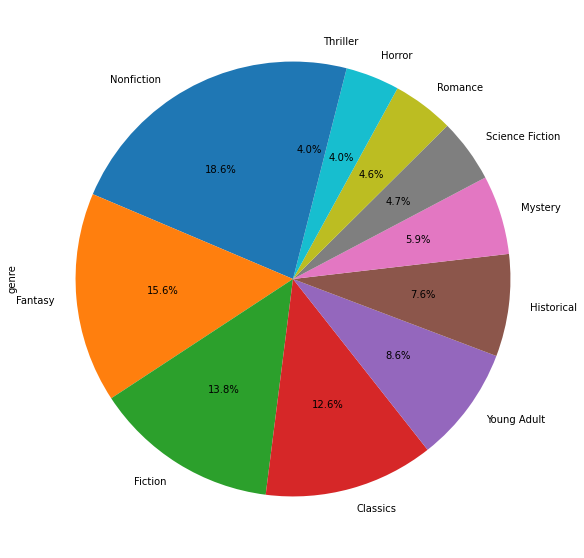

In [128]:
df.genre.value_counts().plot(kind='pie', subplots=True, startangle=90,
figsize=(15,10), autopct='%1.1f%%')

In [129]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['genre_le'] = le.fit_transform(df.genre)

<ipython-input-129-42ab0e313828>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre_le'] = le.fit_transform(df.genre)


In [130]:
df.genre.unique()
df.head()

,book_id,title,author,average_rating,genre,description,url,image_url,word_count,genre_le
0,2657,To Kill a Mockingbird,Harper Lee,4.27,Classics,The unforgettable novel of a childhood in a sl...,https://www.goodreads.com/book/show/2657.To_Ki...,https://i.gr-assets.com/images/S/compressed.ph...,137,0
1,3,Harry Potter and the Sorcerer's Stone,J.K. Rowling,4.47,Fantasy,Harry Potter's life is miserable. His parents ...,https://www.goodreads.com/book/show/3.Harry_Po...,https://i.gr-assets.com/images/S/compressed.ph...,220,1
2,1885,Pride and Prejudice,Jane Austen,4.27,Classics,Alternate cover edition of ISBN 9780679783268S...,https://www.goodreads.com/book/show/1885.Pride...,https://i.gr-assets.com/images/S/compressed.ph...,100,0
3,48855,The Diary of a Young Girl,Anne Frank,4.17,Nonfiction,Discovered in the attic in which she spent the...,https://www.goodreads.com/book/show/48855.The_...,https://i.gr-assets.com/images/S/compressed.ph...,166,6
4,170448,Animal Farm,George Orwell,3.97,Classics,Librarian's note: There is an Alternate Cover ...,https://www.goodreads.com/book/show/170448.Ani...,https://i.gr-assets.com/images/S/compressed.ph...,123,0


In [131]:
df['author'] = df['author'].str.replace(" ","")
df['tags'] = df['title'] + " " + df['author'] + " " + df['description']
df.drop(['word_count', 'author', 'description'], axis=1, inplace=True)

<ipython-input-131-d5cb8fdb6cc9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['author'] = df['author'].str.replace(" ","")
<ipython-input-131-d5cb8fdb6cc9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags'] = df['title'] + " " + df['author'] + " " + df['description']
C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

In [132]:
df['tags'] = df['tags'].apply(lambda x: x.lower())
df.head()

<ipython-input-132-fb7ba43debcc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags'] = df['tags'].apply(lambda x: x.lower())


,book_id,title,average_rating,genre,url,image_url,genre_le,tags
0,2657,To Kill a Mockingbird,4.27,Classics,https://www.goodreads.com/book/show/2657.To_Ki...,https://i.gr-assets.com/images/S/compressed.ph...,0,to kill a mockingbird harperlee the unforgetta...
1,3,Harry Potter and the Sorcerer's Stone,4.47,Fantasy,https://www.goodreads.com/book/show/3.Harry_Po...,https://i.gr-assets.com/images/S/compressed.ph...,1,harry potter and the sorcerer's stone j.k.rowl...
2,1885,Pride and Prejudice,4.27,Classics,https://www.goodreads.com/book/show/1885.Pride...,https://i.gr-assets.com/images/S/compressed.ph...,0,pride and prejudice janeausten alternate cover...
3,48855,The Diary of a Young Girl,4.17,Nonfiction,https://www.goodreads.com/book/show/48855.The_...,https://i.gr-assets.com/images/S/compressed.ph...,6,the diary of a young girl annefrank discovered...
4,170448,Animal Farm,3.97,Classics,https://www.goodreads.com/book/show/170448.Ani...,https://i.gr-assets.com/images/S/compressed.ph...,0,animal farm georgeorwell librarian's note: the...


In [133]:
#stemming
import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def stemming(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
        
    return " ".join(y)

In [134]:
df['tags'] = df['tags'].apply(stemming)
df.head()

<ipython-input-134-beb54dde1334>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags'] = df['tags'].apply(stemming)


,book_id,title,average_rating,genre,url,image_url,genre_le,tags
0,2657,To Kill a Mockingbird,4.27,Classics,https://www.goodreads.com/book/show/2657.To_Ki...,https://i.gr-assets.com/images/S/compressed.ph...,0,to kill a mockingbird harperle the unforgett n...
1,3,Harry Potter and the Sorcerer's Stone,4.47,Fantasy,https://www.goodreads.com/book/show/3.Harry_Po...,https://i.gr-assets.com/images/S/compressed.ph...,1,harri potter and the sorcerer' stone j.k.rowl ...
2,1885,Pride and Prejudice,4.27,Classics,https://www.goodreads.com/book/show/1885.Pride...,https://i.gr-assets.com/images/S/compressed.ph...,0,pride and prejudic janeausten altern cover edi...
3,48855,The Diary of a Young Girl,4.17,Nonfiction,https://www.goodreads.com/book/show/48855.The_...,https://i.gr-assets.com/images/S/compressed.ph...,6,the diari of a young girl annefrank discov in ...
4,170448,Animal Farm,3.97,Classics,https://www.goodreads.com/book/show/170448.Ani...,https://i.gr-assets.com/images/S/compressed.ph...,0,anim farm georgeorwel librarian' note: there i...


In [135]:
#removing stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')

def rem_stopwords(text):
    y = []
    for i in text.split():
        if i not in stop:
            y.append(i)
    return ' '.join(y)

In [136]:
df['tags'] = df['tags'].apply(rem_stopwords)

<ipython-input-136-af1c9ac61f1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags'] = df['tags'].apply(rem_stopwords)


In [137]:
df

,book_id,title,average_rating,genre,url,image_url,genre_le,tags
0,2657,To Kill a Mockingbird,4.27,Classics,https://www.goodreads.com/book/show/2657.To_Ki...,https://i.gr-assets.com/images/S/compressed.ph...,0,kill mockingbird harperle unforgett novel chil...
1,3,Harry Potter and the Sorcerer's Stone,4.47,Fantasy,https://www.goodreads.com/book/show/3.Harry_Po...,https://i.gr-assets.com/images/S/compressed.ph...,1,harri potter sorcerer' stone j.k.rowl harri po...
2,1885,Pride and Prejudice,4.27,Classics,https://www.goodreads.com/book/show/1885.Pride...,https://i.gr-assets.com/images/S/compressed.ph...,0,pride prejudic janeausten altern cover edit is...
3,48855,The Diary of a Young Girl,4.17,Nonfiction,https://www.goodreads.com/book/show/48855.The_...,https://i.gr-assets.com/images/S/compressed.ph...,6,diari young girl annefrank discov attic spent ...
4,170448,Animal Farm,3.97,Classics,https://www.goodreads.com/book/show/170448.Ani...,https://i.gr-assets.com/images/S/compressed.ph...,0,anim farm georgeorwel librarian' note: altern ...
...,...,...,...,...,...,...,...,...
4299,30359743,Noble Beginnings,3.81,Thriller,https://www.goodreads.com/book/show/30359743-n...,https://i.gr-assets.com/images/S/compressed.ph...,9,nobl begin l.t.ryan ace asin: b009k8rhnqin mar...
4300,9413044,Everneath,3.74,Young Adult,https://www.goodreads.com/book/show/9413044-ev...,https://i.gr-assets.com/images/S/compressed.ph...,10,"everneath brodiashton last spring, nikki becke..."
4301,25526965,End of Watch,4.09,Horror,https://www.goodreads.com/book/show/25526965-e...,https://i.gr-assets.com/images/S/compressed.ph...,4,end watch stephenk spectacular final new york ...
4302,10846336,Salvage the Bones,3.93,Fiction,https://www.goodreads.com/book/show/10846336-s...,https://i.gr-assets.com/images/S/compressed.ph...,2,salvag bone jesmynward winner 2011 nation book...


In [138]:
# assign the independent features (text) to X variable and the target to y
X = pd.DataFrame(df['tags'])
X

,tags
0,kill mockingbird harperle unforgett novel chil...
1,harri potter sorcerer' stone j.k.rowl harri po...
2,pride prejudic janeausten altern cover edit is...
3,diari young girl annefrank discov attic spent ...
4,anim farm georgeorwel librarian' note: altern ...
...,...
4299,nobl begin l.t.ryan ace asin: b009k8rhnqin mar...
4300,"everneath brodiashton last spring, nikki becke..."
4301,end watch stephenk spectacular final new york ...
4302,salvag bone jesmynward winner 2011 nation book...


In [139]:
y = df['genre_le']
y

0        0
1        1
2        0
3        6
4        0
        ..
4299     9
4300    10
4301     4
4302     2
4303     2
Name: genre_le, Length: 2669, dtype: int32

In [140]:
y.value_counts()

6     497
1     417
2     367
0     337
10    230
3     203
5     157
8     126
7     122
4     107
9     106
Name: genre_le, dtype: int64

# Balancing The Data

In [141]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [142]:
#performing oversampling on most genres.
strategy = {0:500, 1:734, 2:500, 3:500, 4:500, 5:500,6:500,7:678,8:500,9:500,10:500}
os = RandomOverSampler(sampling_strategy = strategy)

In [143]:
X1, y1 = os.fit_resample(X,y)

C:\Users\Lenovo\anaconda3\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (500) in class 0 will be larger than the number of samples in the majority class (class #6 -> 497)
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (734) in class 1 will be larger than the number of samples in the majority class (class #6 -> 497)
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (500) in class 2 will be larger than the number of samples in the majority class (class #6 -> 497)
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (500) in class 3 will be larger than the number of samples in the majority class (class #6 -> 497)
  warnings.wa

In [144]:
from collections import Counter
print (Counter(y))

Counter({6: 497, 1: 417, 2: 367, 0: 337, 10: 230, 3: 203, 5: 157, 8: 126, 7: 122, 4: 107, 9: 106})


In [145]:
print(Counter(y1))

Counter({1: 734, 7: 678, 0: 500, 6: 500, 10: 500, 8: 500, 2: 500, 4: 500, 5: 500, 3: 500, 9: 500})


In [146]:
#performing undersampling on class 2
strategy = {0:500, 1:500, 2:500, 3:500, 4:500, 5:500,6:500,7:500,8:500,9:500}
us = RandomUnderSampler(sampling_strategy = strategy)

In [147]:
X_new, y_new = us.fit_resample(X1,y1)

In [148]:
print(Counter(y_new))

Counter({0: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500, 6: 500, 7: 500, 8: 500, 9: 500, 10: 500})


<AxesSubplot:>

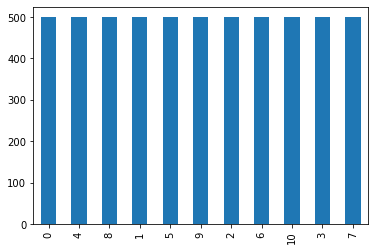

In [149]:
y_new.value_counts().plot(x='y_new',y = 'count',kind = 'bar')

In [150]:
y_new.shape

(5500,)

# Split the dataset into Training and Testing Datasets

In [151]:
#split data into training 80% and test 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.20)

print('Shape of training data:',(X_train.shape))
print('Shape of testing data:',(X_test.shape))

Shape of training data: (4400, 1)
Shape of testing data: (1100, 1)


In [152]:
X_train.head()

,tags
539,emperor' soul brandonsanderson also avail arca...
3923,"best nicholasspark spring 1984, high school st..."
1230,patriot game tomclanc tom clancy' patriot game...
4124,futurolog congress: memoir ijon tichi stanisła...
4350,r.u.r. karelčapek r.u.r.--written 1920--garner...


In [153]:
x_train = X_train.iloc[:,0]
x_train.head()

539     emperor' soul brandonsanderson also avail arca...
3923    best nicholasspark spring 1984, high school st...
1230    patriot game tomclanc tom clancy' patriot game...
4124    futurolog congress: memoir ijon tichi stanisła...
4350    r.u.r. karelčapek r.u.r.--written 1920--garner...
Name: tags, dtype: object

# CountVectorizer - Feature Extraction

In [154]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 10000,stop_words = 'english')

In [155]:
x = cv.fit_transform(x_train).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [156]:
x_test = X_test.iloc[:,0]
x_test.head()

1267    beauti chuckpalahniuk "a billion husband repla...
2920    thin air lisagray investig miss persons—now on...
2110    thinner richardbachman billi halleck, good hus...
2711    hold tight harlancoben tia mike bay never imag...
3106    stiff: curiou live human cadav maryroach stiff...
Name: tags, dtype: object

In [157]:
test_x = cv.transform(x_test).toarray()
test_x.shape

(1100, 10000)

# Model Building

# Multinomial Naive Bayes

In [158]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [159]:
clf1 = MultinomialNB()
clf1.fit(x,y_train)
train_pred = clf1.predict(x)
accuracy = accuracy_score(y_train,train_pred)

print('Accuracy for Training data:', round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_train, train_pred)) 
print(confusion_matrix(y_train, train_pred))      

test_pred = clf1.predict(test_x)
accuracy = accuracy_score(y_test, test_pred)

print("Accuracy for Testing data:",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, test_pred))
print(confusion_matrix(y_test, test_pred))

Accuracy for Training data: 0.98
Other Metrics:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       395
           1       0.97      0.98      0.97       421
           2       0.96      0.97      0.97       403
           3       0.97      0.98      0.98       396
           4       1.00      0.99      1.00       400
           5       0.99      1.00      0.99       401
           6       0.99      0.96      0.98       387
           7       1.00      0.99      0.99       409
           8       0.99      0.99      0.99       395
           9       0.98      1.00      0.99       408
          10       0.98      0.97      0.98       385

    accuracy                           0.98      4400
   macro avg       0.98      0.98      0.98      4400
weighted avg       0.98      0.98      0.98      4400

[[373   3   8   3   0   1   0   2   1   3   1]
 [  2 412   0   2   0   0   1   0   0   1   3]
 [  3   2 392   2   0   1   1   0   0   2   0

# Decision tree

In [160]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [161]:
clf2 = DecisionTreeClassifier()
clf2.fit(x,y_train)
train_pred = clf2.predict(x)
accuracy = accuracy_score(y_train,train_pred)

print('Accuracy for Training data:', round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_train, train_pred)) 
print(confusion_matrix(y_train, train_pred))      

test_pred = clf2.predict(test_x)
accuracy = accuracy_score(y_test, test_pred)

print("Accuracy for Testing data:",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, test_pred))
print(confusion_matrix(y_test, test_pred))

Accuracy for Training data: 1.0
Other Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       421
           2       1.00      1.00      1.00       403
           3       1.00      1.00      1.00       396
           4       1.00      1.00      1.00       400
           5       1.00      1.00      1.00       401
           6       1.00      1.00      1.00       387
           7       1.00      1.00      1.00       409
           8       1.00      1.00      1.00       395
           9       1.00      1.00      1.00       408
          10       1.00      1.00      1.00       385

    accuracy                           1.00      4400
   macro avg       1.00      1.00      1.00      4400
weighted avg       1.00      1.00      1.00      4400

[[395   0   0   0   0   0   0   0   0   0   0]
 [  0 421   0   0   0   0   0   0   0   0   0]
 [  0   0 403   0   0   0   0   0   0   0   0]

# RandomForest

In [162]:
clf3= RandomForestClassifier(max_depth=2, random_state=0)
clf3.fit(x, y_train)
train_pred = clf3.predict(x)
accuracy = accuracy_score(y_train,train_pred)

print('Accuracy for Training data:', round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_train, train_pred)) 
print(confusion_matrix(y_train, train_pred))      

test_pred = clf3.predict(test_x)
accuracy = accuracy_score(y_test, test_pred)

print("Accuracy for Testing data:",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, test_pred))
print(confusion_matrix(y_test, test_pred))

Accuracy for Training data: 0.49
Other Metrics:
              precision    recall  f1-score   support

           0       0.74      0.27      0.39       395
           1       0.24      0.81      0.37       421
           2       0.48      0.20      0.28       403
           3       0.63      0.34      0.44       396
           4       0.91      0.56      0.69       400
           5       0.56      0.78      0.65       401
           6       0.86      0.23      0.36       387
           7       0.43      0.76      0.55       409
           8       0.60      0.76      0.67       395
           9       0.73      0.58      0.64       408
          10       1.00      0.06      0.11       385

    accuracy                           0.49      4400
   macro avg       0.65      0.48      0.47      4400
weighted avg       0.65      0.49      0.47      4400

[[106 176  20  23   0  11   2  36  15   6   0]
 [  3 339   0   3   9  10   0  22  33   2   0]
 [ 11  95  80  29   6  34   7  74  44  23   0

# KNN

In [163]:
from sklearn.neighbors import KNeighborsClassifier

In [164]:
clf4= KNeighborsClassifier(n_neighbors=5, metric='euclidean')
clf4.fit(x, y_train)
train_pred = clf4.predict(x)
accuracy = accuracy_score(y_train,train_pred)

print('Accuracy score for Training data:', round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_train, train_pred)) 
print(confusion_matrix(y_train, train_pred))      

test_pred = clf4.predict(test_x)
accuracy = accuracy_score(y_test, test_pred)

print("Accuracy for Testing data:",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, test_pred))
print(confusion_matrix(y_test, test_pred))

Accuracy score for Training data: 0.71
Other Metrics:
              precision    recall  f1-score   support

           0       0.49      0.70      0.58       395
           1       0.84      0.52      0.64       421
           2       1.00      0.35      0.52       403
           3       0.61      0.77      0.68       396
           4       0.86      0.96      0.91       400
           5       0.92      0.86      0.89       401
           6       0.87      0.32      0.46       387
           7       0.96      0.92      0.94       409
           8       0.96      0.89      0.92       395
           9       0.39      0.95      0.55       408
          10       0.93      0.53      0.67       385

    accuracy                           0.71      4400
   macro avg       0.80      0.71      0.71      4400
weighted avg       0.80      0.71      0.71      4400

[[275   3   0   7   2   1   0   0   1 106   0]
 [ 39 219   0  27   4   4   1   2   0 121   4]
 [ 89   8 143  32  16   8   8   7   5  

# Logistic Regression

In [165]:
from sklearn.linear_model import LogisticRegression

In [166]:
clf5 = LogisticRegression(max_iter=2000)
clf5.fit(x, y_train)
train_pred = clf5.predict(x)
accuracy = accuracy_score(y_train,train_pred)

print('Accuracy score for Training data:', round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_train, train_pred)) 
print(confusion_matrix(y_train, train_pred))      

test_pred = clf5.predict(test_x)
accuracy = accuracy_score(y_test, test_pred)

print("Accuracy for Testing data:",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, test_pred))
print(confusion_matrix(y_test, test_pred))

Accuracy score for Training data: 1.0
Other Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       421
           2       1.00      1.00      1.00       403
           3       1.00      1.00      1.00       396
           4       1.00      1.00      1.00       400
           5       1.00      1.00      1.00       401
           6       1.00      1.00      1.00       387
           7       1.00      1.00      1.00       409
           8       1.00      1.00      1.00       395
           9       1.00      1.00      1.00       408
          10       1.00      1.00      1.00       385

    accuracy                           1.00      4400
   macro avg       1.00      1.00      1.00      4400
weighted avg       1.00      1.00      1.00      4400

[[395   0   0   0   0   0   0   0   0   0   0]
 [  0 421   0   0   0   0   0   0   0   0   0]
 [  0   0 403   0   0   0   0   0   0   

# SVM

In [167]:
from sklearn import svm
from sklearn.svm import SVC

In [168]:
clf6= SVC()
clf6.fit(x, y_train)
train_pred = clf6.predict(x)
accuracy = accuracy_score(y_train,train_pred)

print('Accuracy score for Training data:', round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_train, train_pred)) 
print(confusion_matrix(y_train, train_pred))      

test_pred = clf6.predict(test_x)
accuracy = accuracy_score(y_test, test_pred)

print("Accuracy for Testing data:",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, test_pred))
print(confusion_matrix(y_test, test_pred))

Accuracy score for Training data: 0.98
Other Metrics:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       395
           1       0.99      0.99      0.99       421
           2       0.97      1.00      0.98       403
           3       1.00      0.97      0.98       396
           4       1.00      0.99      0.99       400
           5       1.00      1.00      1.00       401
           6       1.00      0.97      0.98       387
           7       1.00      1.00      1.00       409
           8       1.00      1.00      1.00       395
           9       1.00      0.98      0.99       408
          10       0.97      0.98      0.98       385

    accuracy                           0.98      4400
   macro avg       0.99      0.98      0.98      4400
weighted avg       0.99      0.98      0.98      4400

[[385   1   7   0   0   0   0   0   1   0   1]
 [  3 415   0   1   0   0   0   0   0   0   2]
 [  0   1 402   0   0   0   0   0   0  

# SGD Classifier

In [169]:
from sklearn.linear_model import SGDClassifier

In [170]:
clf7= SGDClassifier(early_stopping= True)
clf7.fit(x, y_train)
train_pred = clf7.predict(x)
accuracy = accuracy_score(y_train,train_pred)

print('Accuracy score for Training data:', round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_train, train_pred)) 
print(confusion_matrix(y_train, train_pred))      

test_pred = clf7.predict(test_x)
accuracy = accuracy_score(y_test, test_pred)

print("Accuracy for Testing data:",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, test_pred))
print(confusion_matrix(y_test, test_pred))

Accuracy score for Training data: 0.99
Other Metrics:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       395
           1       0.99      0.99      0.99       421
           2       0.99      0.97      0.98       403
           3       0.99      0.99      0.99       396
           4       0.99      1.00      1.00       400
           5       0.99      0.99      0.99       401
           6       0.99      0.98      0.98       387
           7       1.00      1.00      1.00       409
           8       0.99      1.00      0.99       395
           9       1.00      1.00      1.00       408
          10       0.99      0.98      0.99       385

    accuracy                           0.99      4400
   macro avg       0.99      0.99      0.99      4400
weighted avg       0.99      0.99      0.99      4400

[[391   0   1   1   0   1   0   0   1   0   0]
 [  2 418   0   0   0   0   0   0   0   0   1]
 [  4   1 390   1   1   3   2   0   0  


# GaussianNB

In [171]:
from sklearn.naive_bayes import GaussianNB

In [172]:
clf8= GaussianNB()
clf8.fit(x, y_train)
train_pred = clf8.predict(x)
accuracy = accuracy_score(y_train,train_pred)

print('Accuracy score for Training data:', round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_train, train_pred)) 
print(confusion_matrix(y_train, train_pred))      

test_pred = clf8.predict(test_x)
accuracy = accuracy_score(y_test, test_pred)

print("Accuracy for Testing data:",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, test_pred))
print(confusion_matrix(y_test, test_pred))

Accuracy score for Training data: 1.0
Other Metrics:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       395
           1       1.00      0.99      1.00       421
           2       1.00      1.00      1.00       403
           3       0.98      0.99      0.99       396
           4       0.99      1.00      1.00       400
           5       1.00      1.00      1.00       401
           6       1.00      0.99      0.99       387
           7       1.00      1.00      1.00       409
           8       0.99      1.00      1.00       395
           9       1.00      1.00      1.00       408
          10       1.00      1.00      1.00       385

    accuracy                           1.00      4400
   macro avg       1.00      1.00      1.00      4400
weighted avg       1.00      1.00      1.00      4400

[[392   0   0   3   0   0   0   0   0   0   0]
 [  0 418   0   3   0   0   0   0   0   0   0]
 [  0   0 403   0   0   0   0   0   0   

# Neural Network

In [173]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier

def create_model():
    clf9 = Sequential()
    clf9.add(Dense(10, input_dim=10000, kernel_initializer='uniform', activation='relu'))
    clf9.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    clf9.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return clf9

In [174]:
clf9 = KerasClassifier(build_fn=create_model,verbose = 0, batch_size = 10, epochs = 50 )
clf9.fit(x, y_train)
train_pred = clf9.predict(x)
accuracy = accuracy_score(y_train,train_pred)

print('Accuracy score for Training data:', round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_train, train_pred)) 
print(confusion_matrix(y_train, train_pred))      

test_pred = clf9.predict(test_x)
accuracy = accuracy_score(y_test, test_pred)

print("Accuracy for Testing data:",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, test_pred))
print(confusion_matrix(y_test, test_pred))

C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Accuracy score for Training data: 0.1
Other Metrics:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       395
           1       0.10      1.00      0.17       421
           2       0.00      0.00      0.00       403
           3       0.00      0.00      0.00       396
           4       0.00      0.00      0.00       400
           5       0.00      0.00      0.00       401
           6       0.00      0.00      0.00       387
           7       0.00      0.00      0.00       409
           8       0.00      0.00      0.00       395
           9       0.00      0.00      0.00       408
          10       0.00      0.00      0.00       385

    accuracy                           0.10      4400
   macro avg       0.01      0.09      0.02      4400
weighted avg       0.01      0.10      0.02      4400

[[  0 395   0   0   0   0   0   0   0   0   0]
 [  0 421   0   0   0   0   0   0   0   0   0]
 [  0 403   0   0   0   0   0   0   0   

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy for Testing data: 0.07
Other Metrics:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       105
           1       0.07      1.00      0.13        79
           2       0.00      0.00      0.00        97
           3       0.00      0.00      0.00       104
           4       0.00      0.00      0.00       100
           5       0.00      0.00      0.00        99
           6       0.00      0.00      0.00       113
           7       0.00      0.00      0.00        91
           8       0.00      0.00      0.00       105
           9       0.00      0.00      0.00        92
          10       0.00      0.00      0.00       115

    accuracy                           0.07      1100
   macro avg       0.01      0.09      0.01      1100
weighted avg       0.01      0.07      0.01      1100

[[  0 105   0   0   0   0   0   0   0   0   0]
 [  0  79   0   0   0   0   0   0   0   0   0]
 [  0  97   0   0   0   0   0   0   0   0   0]

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [184]:
Model_Name = ['Multinomial NB', 'Logistic Regression', 'SVM', 'SGDClassifier', 'Guassian NB', 'Decision Tree', 'Random Forest', 'KNN', 'Neural Network']
Train_Accuracy = [0.98,1.00,0.98,0.99,1.00,1.00,0.49,0.71,0.10]
Test_Accuracy = [0.88,0.89,0.87,0.87,0.83,0.81,0.44,0.49,0.07]

In [185]:
Model_Table = pd.DataFrame({'Model_Name' : Model_Name,
                            'Train_Accuracy' : Train_Accuracy, 'Test_Accuracy' : Test_Accuracy})

In [186]:
Model_Table

,Model_Name,Train_Accuracy,Test_Accuracy
0,Multinomial NB,0.98,0.88
1,Logistic Regression,1.00,0.89
2,SVM,0.98,0.87
3,SGDClassifier,0.99,0.87
4,Guassian NB,1.00,0.83
5,Decision Tree,1.00,0.81
6,Random Forest,0.49,0.44
7,KNN,0.71,0.49
8,Neural Network,0.10,0.07


In [187]:
rec = ["A comet the color of blood and flame cuts across the sky. Two great leaders—Lord Eddard Stark and Robert Baratheon—who hold sway over an age of enforced peace are dead, victims of royal treachery. Now, from the ancient citadel of Dragonstone to the forbidding shores of Winterfell, chaos reigns. Six factions struggle for control of a divided land and the Iron Throne of the Seven Kingdoms, preparing to stake their claims through tempest, turmoil, and war."]

In [188]:
t = cv.transform(rec).toarray()

In [189]:
pr = le.inverse_transform(clf1.predict(t))

In [190]:
pr[0]

'Fantasy'

In [193]:
def recommend(genre):
    recommended_books = df[df['genre'] == genre].sort_values(by = 'average_rating',ascending = False).head()
    print(recommended_books.title)
    return

In [194]:
recommend('Fantasy')

3424                                    Words of Radiance
3255                                     The High Auction
1487    A Song of Ice and Fire (A Song of Ice and Fire...
708                                  Adhaata Asao's Liege
14                   Harry Potter and the Deathly Hallows
Name: title, dtype: object


# Exporting PKL Files

In [195]:
import pickle
pickle.dump(df,open('books.pkl','wb'))
pickle.dump(clf1,open('model.pkl','wb'))
pickle.dump(cv,open('CountVectorizer.pkl','wb'))

In [197]:
rec = [stemming('After a lifetime of bottling up his magical powers, Harry finally feels like a normal kid.')]
rec

['after a lifetim of bottl up hi magic powers, harri final feel like a normal kid.']

In [198]:
tags= pd.DataFrame({'tags': rec})
df_tags = df[['tags']]

In [199]:
tags = tags.append(df_tags,ignore_index=True)

In [200]:
tags

,tags
0,"after a lifetim of bottl up hi magic powers, h..."
1,kill mockingbird harperle unforgett novel chil...
2,harri potter sorcerer' stone j.k.rowl harri po...
3,pride prejudic janeausten altern cover edit is...
4,diari young girl annefrank discov attic spent ...
...,...
2665,nobl begin l.t.ryan ace asin: b009k8rhnqin mar...
2666,"everneath brodiashton last spring, nikki becke..."
2667,end watch stephenk spectacular final new york ...
2668,salvag bone jesmynward winner 2011 nation book...


In [201]:
tags_test_cv = cv.fit_transform(tags['tags']).toarray()
tags_test_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [202]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_tags = cosine_similarity(tags_test_cv)

In [203]:
similarity_tags[0]

array([1.        , 0.        , 0.45029432, ..., 0.13612216, 0.05749596,
       0.01657256])

In [204]:
recommended_sorted_list = sorted(list(enumerate(similarity_tags[0])),reverse= True,key= lambda x:x[1])[1:6]
recommended_sorted_list
recommended_books = []
recommended_book_posters = []
for i in recommended_sorted_list:
    recommended_books.append(df.iloc[i[0]].title)
    recommended_book_posters.append(df.iloc[i[0]].image_url)

In [205]:
recommended_book_posters

['https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1320399351l/1885.jpg',
 'https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1559986152l/386162.jpg',
 'https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1388189974l/9791.jpg',
 'https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1166334569l/10882._SY475_.jpg',
 'https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1449142000l/22816087.jpg']

In [207]:
recommended_books

['Pride and Prejudice',
 "The Hitchhiker's Guide to the Galaxy",
 'A Walk in the Woods: Rediscovering America on the Appalachian Trail',
 "Hell's Angels",
 'Seveneves']